<a href="https://colab.research.google.com/github/tsayula/Capstone/blob/main/Capstone_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d arpitjain007/game-of-deep-learning-ship-datasets

 85% 69.0M/80.9M [00:00<00:00, 79.3MB/s]
100% 80.9M/80.9M [00:01<00:00, 83.0MB/s]


In [7]:
!ls

game-of-deep-learning-ship-datasets.zip  sample_submission_ns2btKE.csv	train
kaggle.json				 test_ApKoW4T.csv


In [8]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip


Archive:  game-of-deep-learning-ship-datasets.zip
replace sample_submission_ns2btKE.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [9]:



!ls

kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train


In [10]:
import pandas as pd
import numpy as np
import keras_preprocessing.image

In [11]:
import sys
import os
import random
from pathlib import Path

In [12]:
# Image processing
import imageio
import cv2
import skimage.transform

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

In [13]:
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [14]:
import os
print(os.listdir("/content/gdrive/My Drive/Kaggle"))
toy= False

['sample_submission_ns2btKE.csv', 'test_ApKoW4T.csv', 'kaggle.json', 'train']


In [19]:

ship_images= (os.listdir("/content/gdrive/My Drive/Kaggle/train/images"))


In [47]:
!ls

kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train


In [ ]:
for ship in ship_images: 
  if ship.split('.')[0]!= 'jpg':
    print(ship)
  

8932


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [46]:
ship_images[0].split('.')[1]

'jpg'

In [48]:
def append_extension(fn):
  return fn + ".jpg"

In [63]:
train_df= pd.read_csv("train/train.csv", dtype= str)
test_df= pd.read_csv('sample_submission_ns2btKE.csv', dtype= str)

train_df['image']= train_df['image'].apply(append_extension)
test_df['image']= test_df['image'].apply(append_extension)

data_generator= ImageDataGenerator(rescale= 1./255., validation_split=0.25)

In [70]:
train_generator= data_generator.flow_from_dataframe(
    dataframe=train_df, directory= '/train/images', x_col='image', y_col= 'category', subset= 'training', target_size=(64, 64),
     batch_size=29, seed= 42, shuffle= True,  class_mode='categorical', validate_filenames=False
)
validation_generator= data_generator.flow_from_dataframe(
    dataframe=train_df, directory= '/train/images', x_col='image', y_col= 'category', subset= 'validation', target_size=(64,64),
     batch_size= 29, seed= 42, shuffle= True,  class_mode='categorical', validate_filenames=False
)

test_data_generator= ImageDataGenerator(rescale= 1./255.)

test_generator= data_generator.flow_from_dataframe(
    dataframe= test_df, directory= 'test_ApKoW4T.csv', x_col='image', y_col= None, subset= 'validation', target_size=(64,64),
     batch_size= 29, seed= 42, shuffle= False,  class_mode= None, validate_filenames=False
)

Found 4689 non-validated image filenames belonging to 5 classes.
Found 1563 non-validated image filenames belonging to 5 classes.
Found 670 non-validated image filenames.


In [79]:
print('Number of Samples: ', train_generator.samples)
print('Number of Classes: ', len(set(train_generator.classes)))
print('Number of Samples per Class (roughly): ', int(train_generator.samples)/len(train_generator.class_indices))

Number of Samples:  4689
Number of Classes:  5
Number of Samples per Class (roughly):  937.8


In [32]:
all_df= pd.read_csv('train/train.csv')
if toy:
  all_df= all_df.sample(8932)

In [33]:
all_df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


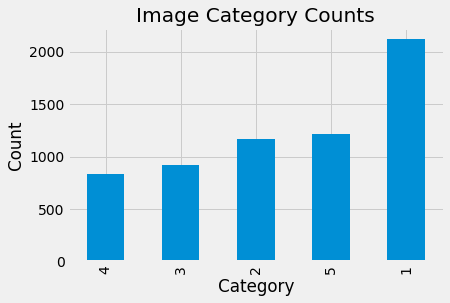

In [80]:
all_df.category.value_counts(ascending=True).plot(kind='bar')
plt.title('Image Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train


In [12]:
#getting all the training data(8932 images)
train_data_dir= 'train'


In [87]:
all_df

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
...,...,...
6247,2881056.jpg,3
6248,1145083.jpg,2
6249,2898652.jpg,5
6250,2868175.jpg,3


In [14]:
train_labels = pd.read_csv('train/train.csv')


In [41]:
train_generator= train_generator = ImageDataGenerator().flow_from_csv(
        train_data_dir, 
        target_size=(128, 128), batch_size=32)

train_images= next(train_generator)

Found 8932 images belonging to 1 classes.


In [75]:
np.shape(train_s)

TypeError: ignored

In [ ]:
train_labels_array= np.array(train_labels)
train_images

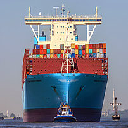

In [36]:
array_to_img(train_images[5])

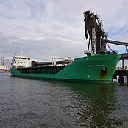

In [37]:
array_to_img(train_images[40])

In [21]:
#looking at shape of train images and labels
print(np.shape(train_images))
print(np.shape(train_labels))

(8932, 64, 64, 3)
(8932, 1)


In [24]:
train_labels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [76]:
train_labels

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
...,...,...
6247,2881056.jpg,3
6248,1145083.jpg,2
6249,2898652.jpg,5
6250,2868175.jpg,3


In [30]:
!ls

kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train


kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train
